# NOAA data - Get station data

One can get the NOAA hourly precipitation data here: https://www.ncdc.noaa.gov/cdo-web/search?datasetid=PRECIP_HLY#


This notebook gets the station data from the CSV file product.
The sample used here is for April 2013, for Illinois state.

In [1]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Set the file path of the CSV file.

In [2]:
fname = 'C:/Users/irene/Documents/Work/Data/NCDC_NOAA/NOAA_HourlyPrecip_April2013.csv'

Read the file as a pandas dataframe.

In [3]:
df = pd.read_csv(fname,header=0)

In [4]:
df.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:111302,CARMI 3 IL US,102.1,38.0733,-88.1805,20130422 09:00,25399.75,],
1,COOP:111302,CARMI 3 IL US,102.1,38.0733,-88.1805,20130423 14:00,2.54,,
2,COOP:111302,CARMI 3 IL US,102.1,38.0733,-88.1805,20130424 01:00,2.54,,
3,COOP:111302,CARMI 3 IL US,102.1,38.0733,-88.1805,20130424 04:00,2.54,,
4,COOP:111302,CARMI 3 IL US,102.1,38.0733,-88.1805,20130424 08:00,2.54,,


Check how many stations there are.

In [5]:
len(df['STATION_NAME'].unique())

58

Some measurements are flagged. To see what flags are included in the dataset:

In [6]:
df['Measurement Flag'].unique()

array([']', ' ', 'T', '['], dtype=object)

According to the documentation, `T` flag means "trace", and the values are zero.`[` and `]` flags are missing data, so we can set that as NaN. 

In [15]:
df.loc[df['Measurement Flag'] == '[', 'HPCP'] = np.nan
df.loc[df['Measurement Flag'] == ']', 'HPCP'] = np.nan

In [17]:
df.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:111302,CARMI 3 IL US,102.1,38.0733,-88.1805,20130422 09:00,NaN,],
1,COOP:111302,CARMI 3 IL US,102.1,38.0733,-88.1805,20130423 14:00,2.54,,
2,COOP:111302,CARMI 3 IL US,102.1,38.0733,-88.1805,20130424 01:00,2.54,,
3,COOP:111302,CARMI 3 IL US,102.1,38.0733,-88.1805,20130424 04:00,2.54,,
4,COOP:111302,CARMI 3 IL US,102.1,38.0733,-88.1805,20130424 08:00,2.54,,


Select a station to get data from. 

To see which station has more complete recordings, we can print how many measurements each station made wthin the time period.

In [21]:
stations = df['STATION'].unique()

In [22]:
for station in stations:
    df_stn_1 = df.loc[(df['STATION']==station)]
    print(station+': '+str(len(df_stn_1)))

COOP:111302: 5
COOP:115825: 35
COOP:111664: 11
COOP:111743: 34
COOP:111549: 155
COOP:112193: 35
COOP:116157: 35
COOP:118179: 107
COOP:110330: 33
COOP:116711: 121
COOP:112687: 35
COOP:112923: 27
COOP:114629: 24
COOP:113290: 41
COOP:115272: 34
COOP:115751: 106
COOP:115079: 28
COOP:118740: 40
COOP:110583: 36
COOP:117014: 36
COOP:118389: 39
COOP:114317: 32
COOP:110510: 33
COOP:114879: 41
COOP:113666: 27
COOP:115768: 40
COOP:114957: 24
COOP:118916: 41
COOP:117187: 1
COOP:117382: 158
COOP:114078: 36
COOP:112011: 39
COOP:113262: 38
COOP:111284: 33
COOP:114198: 40
COOP:114710: 37
COOP:114355: 37
COOP:115841: 33
COOP:116610: 42
COOP:111577: 37
COOP:114603: 37
COOP:114805: 38
COOP:119816: 36
COOP:113879: 14
COOP:117077: 33
COOP:111290: 31
COOP:115493: 37
COOP:117072: 100
COOP:117391: 37
COOP:116185: 40
COOP:117150: 38
COOP:110082: 37
COOP:110281: 27
COOP:112140: 38
COOP:114442: 29
COOP:117876: 35
COOP:117833: 37
COOP:118204: 37


Select a station.

In [23]:
stn = 'COOP:117382'

df_stn = df.loc[(df.STATION == stn)]

Plot the data.

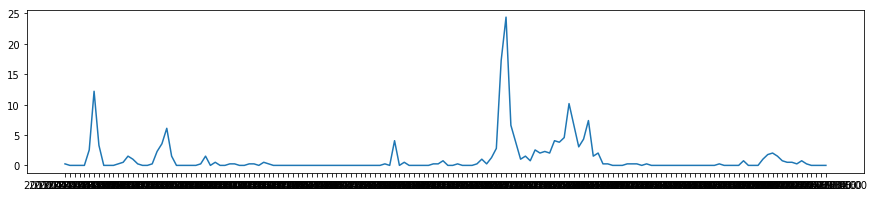

In [26]:
plt.figure(figsize=(15,3))
plt.plot(df_stn['DATE'],df_stn['HPCP'])